# Analyse Listings dataset and identify outlier criteria


Since identification of outliers is imperative for Opendoor's success, this model endeavors to find the features that are the most important in detecting an outlier transaction. 

As this is a binary classification problem, we will use a Dtree model. In future phases of the project we can train multiple classification based models to compare against each other, and use the one with the best performance

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import time
import random
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
today = datetime.today()
from matplotlib import pyplot
os.chdir('/Users/saurabhkurjekar/Desktop/Opendoor') 

In [3]:
df=pd.read_csv('input_dataset.csv')

## Data

The data set contains the following features:
- **is_outlier**: Dependent variable of this model. We will use other independent variables (defining features of the home) to predict this 
- home_id: ID for the individual home
- market_id: ID for the city of the home
- zip_id: ID for the zip of the home
- purchase_date: Date on which the home was purchased
- purchase_price: Price at which the home was purchased
- year_built
- home_age
- zip_hpa
- zip_clearance_rate 
- zip_avg_num_bedrooms
- zip_avg_sq_ft
- zip_avg_home_age
- zip_avg_close_price
- zip_avg_lot_sq_ft
- and 120 others....

In [4]:
df.sample(5)

,home_id,market_id,zip_id,purchase_date,is_outlier,purchase_price,year_built,home_age,zip_hpa,zip_clearance_rate,...,roof_construction,porch_area,patio_area,deck_flag,deck_area,feature_balcony_flag,balcony_area,breezeway_flag,driveway_area,driveway_material
802,803.0,1499.0,1456.0,6/5/17,0.0,253000.0,2001.0,18.0,0.096162,NaN,...,NaN,20.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2855,2856.0,4213.0,3872.0,7/2/18,0.0,178500.0,1974.0,45.0,0.131129,0.040830,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
1565,1566.0,1988.0,1985.0,12/8/17,0.0,170000.0,2003.0,16.0,0.081808,0.017228,...,NaN,0.0,240.0,1.0,120.0,NaN,NaN,NaN,0.0,NaN
3701,3702.0,4213.0,4170.0,1/10/18,1.0,230900.0,1979.0,40.0,0.117775,0.038117,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
914,915.0,1499.0,1392.0,4/24/18,0.0,201500.0,1994.0,25.0,0.108671,0.056917,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Columns: 134 entries, home_id to driveway_material
dtypes: float64(72), object(62)
memory usage: 5.1+ MB


In [6]:
df.describe()

,home_id,market_id,zip_id,is_outlier,purchase_price,year_built,home_age,zip_hpa,zip_clearance_rate,zip_avg_num_bedrooms,...,roof_construction,porch_area,patio_area,deck_flag,deck_area,feature_balcony_flag,balcony_area,breezeway_flag,driveway_area,driveway_material
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4901.000000,4732.000000,4994.000000,...,144.000000,4970.000000,4970.000000,4831.000000,4970.000000,1.0,0.0,1.0,4969.0,0.0
mean,2500.500000,3180.913800,3094.483600,0.158200,240392.786000,1997.660000,21.340000,0.091798,0.034989,3.492895,...,120.840278,63.868209,34.448893,0.052370,11.619316,0.0,NaN,0.0,0.0,NaN
std,1443.520003,1363.734682,1384.794154,0.364965,68563.675487,12.120816,12.120816,0.039169,0.016415,0.324938,...,25.200362,116.499159,111.639870,0.222795,59.769133,NaN,NaN,NaN,0.0,NaN
min,1.000000,3.000000,1.000000,0.000000,0.000000,1957.000000,2.000000,-0.036108,0.006386,1.502623,...,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
25%,1250.750000,1499.000000,1487.000000,0.000000,192000.000000,1990.000000,13.000000,0.064766,0.023787,3.294152,...,116.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
50%,2500.500000,4213.000000,4046.000000,0.000000,229750.000000,2001.000000,18.000000,0.088431,0.032057,3.540357,...,116.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
75%,3750.250000,4213.000000,4196.000000,0.000000,276025.000000,2006.000000,29.000000,0.109688,0.042411,3.705347,...,116.000000,84.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
max,5000.000000,5000.000000,5000.000000,1.000000,490000.000000,2017.000000,62.000000,0.433809,0.187500,7.518248,...,253.000000,1895.000000,2047.000000,1.000000,936.000000,0.0,NaN,0.0,0.0,NaN


# Data Preprocessing 

Playing around with the dataset to learn more about it  

### 1) Identifying % missing data in each column

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(10)

,column_name,percent_missing
home_id,home_id,0.019996
bathrooms,bathrooms,0.019996
bedrooms,bedrooms,0.019996
home_age,home_age,0.019996
year_built,year_built,0.019996
sq_ft,sq_ft,0.019996
is_outlier,is_outlier,0.019996
purchase_date,purchase_date,0.019996
market_id,market_id,0.019996
zip_id,zip_id,0.019996


Clearly, there are many fields that do not contain data about the houses. Fields like Driveway_material and balcony_area have no data. Moreover, a visual inspection of the fields tells us that these features wouldn't have an outsize influence in the price of a home (and thus not affect the dep also not be big contributors in predicting if a home is outlier or not. Since we have a rich dataset with multiple fields, we can be aggressive and remove columns  which have >=5% missing values

In [8]:
df = df.loc[:, df.isnull().sum() * 100 / len(df) <= 10]
df.shape

(5001, 70)

### 2) Converting categorical variables to columns

In [9]:
# df.dtypes
df_object=df.loc[:, df.dtypes == object]
# df_object.to_csv('df_object.csv')
df_object.sample(3)

,purchase_date,hvac_age,roof_age,septic,kitchen_condition,upgrades,bathroom_condition,floor_condition,floor_type,back_yard_condition,interior_paint_condition,kitchen_counters,kitchen_appliance_type,is_condominium,sewer,roof,flooring,exterior_features,dwelling_type
747,4/30/18,0_to_7_years,0_to_7_years,False,typical_use,True,typical_use,great_condition,other,Needs work,typical_use,formica,Stainless Steel,True,"[City Sewer, City Water]","[""composition""]","[""laminate"",""tile""]","[""balcony"",""patio_open""]",townhouse
3185,2/20/18,0_to_7_years,not_sure,False,great_condition,True,typical_use,great_condition,tile,Fully Landscaped,typical_use,granite_slab,Stainless Steel,False,[Sewer - Public],"[""tile""]","[""carpet"",""tile""]","[""patio_covered""]",single_family
1588,12/19/17,0_to_7_years,8_to_15_years,False,great_condition,False,great_condition,typical_use,other,Needs work,great_condition,formica,Mixed,False,"[Low Flow Fixtures, Public Water, Sewer Connec...","[""composition""]","[""carpet"",""wood""]","[""fenced_yard"",""patio_open"",""porch""]",single_family


In [10]:
cat_vars=['hvac_age','roof_age','septic','kitchen_condition','upgrades','bathroom_condition','floor_condition','floor_type','back_yard_condition','interior_paint_condition','kitchen_counters','kitchen_appliance_type','is_condominium','sewer','roof','flooring','exterior_features','dwelling_type']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    df.drop([var],axis=1,inplace=True)
cat_vars=['hvac_age','roof_age','septic','kitchen_condition','upgrades','bathroom_condition','floor_condition','floor_type','back_yard_condition','interior_paint_condition','kitchen_counters','kitchen_appliance_type','is_condominium','sewer','roof','flooring','exterior_features','dwelling_type']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

### 3) Converting date variables to the right format

In [11]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['purchase_date']=df['purchase_date'].map(dt.datetime.toordinal)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(4168, 708)

In [14]:
X = df.drop('is_outlier',axis=1)
y = df['is_outlier']

Feature: 0, Score: 0.02294
Feature: 1, Score: 0.00165
Feature: 2, Score: 0.01780
Feature: 3, Score: 0.06966
Feature: 4, Score: 0.05404
Feature: 5, Score: 0.01010
Feature: 6, Score: 0.02278
Feature: 7, Score: 0.01486
Feature: 8, Score: 0.03830
Feature: 9, Score: 0.01454
Feature: 10, Score: 0.01272
Feature: 11, Score: 0.02579
Feature: 12, Score: 0.01555
Feature: 13, Score: 0.01888
Feature: 14, Score: 0.01361
Feature: 15, Score: 0.00336
Feature: 16, Score: 0.00495
Feature: 17, Score: 0.00665
Feature: 18, Score: 0.00678
Feature: 19, Score: 0.02039
Feature: 20, Score: 0.00333
Feature: 21, Score: 0.00168
Feature: 22, Score: 0.00329
Feature: 23, Score: 0.00449
Feature: 24, Score: 0.00266
Feature: 25, Score: 0.00272
Feature: 26, Score: 0.00517
Feature: 27, Score: 0.00136
Feature: 28, Score: 0.00276
Feature: 29, Score: 0.02356
Feature: 30, Score: 0.00529
Feature: 31, Score: 0.01946
Feature: 32, Score: 0.02447
Feature: 33, Score: 0.02522
Feature: 34, Score: 0.06624
Feature: 35, Score: 0.00609
Fe

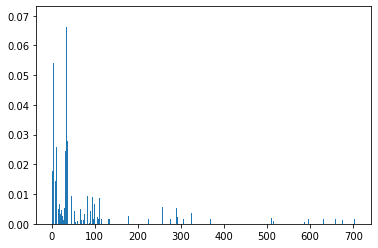

In [21]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)


# get importance
importance = model.feature_importances_
# summarize feature importance
scores=[]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    scores.append(v)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [22]:
list1=list(X.columns.values)

In [26]:
feature_df = pd.DataFrame(
    {'feature': list1,
#      'S_No': importance,
     'score':scores
    })
feature_df.to_csv('Feature_importance.csv')

# Exploratory Analysis
Investigating the distribution of various features in the data

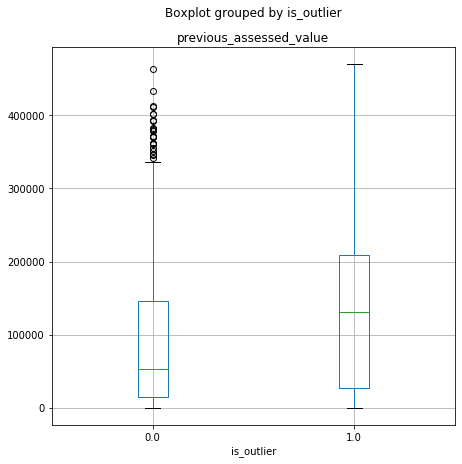

In [27]:
df.boxplot(column='previous_assessed_value', by='is_outlier', figsize=(7,7))

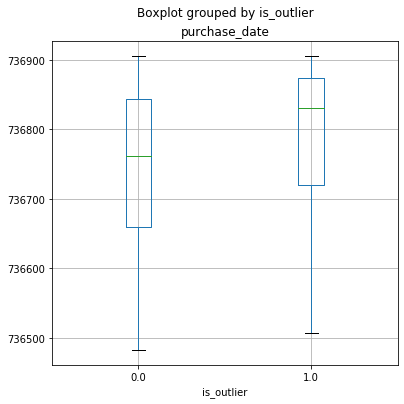

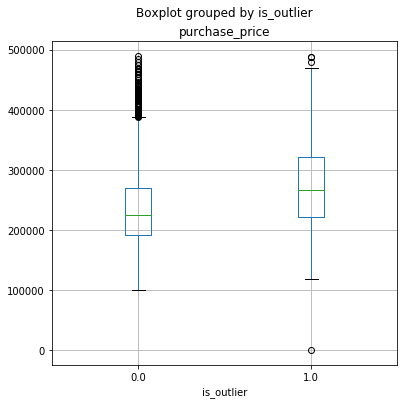

In [28]:
df.boxplot(column='purchase_date', by='is_outlier', figsize=(6,6))
df.boxplot(column='purchase_price', by='is_outlier', figsize=(6,6))

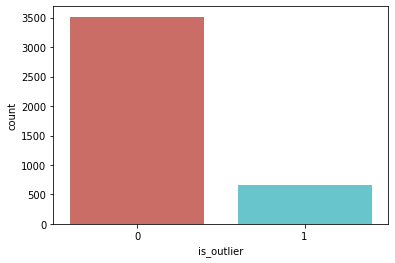

In [140]:
df.is_outlier.value_counts()
sns.countplot(x = 'is_outlier', data = df, palette = 'hls')
plt.show()

In [141]:
df.is_outlier.value_counts()

0    3515
1     657
Name: is_outlier, dtype: int64

In [142]:
df1 = df.reindex(columns=['purchase_price','sq_ft','year_built','tax_assessed_value_total','is_outlier'])#, 'previous_assessed_value', 'tax_assessed_value_total', 'tax_market_value_improvements', 'above_ground_interior_sq_ft', 'tax_assessed_value_improvements', 'roof_material', 'fireplace_count', 'area1st_floor', 'zip_avg_close_price'])

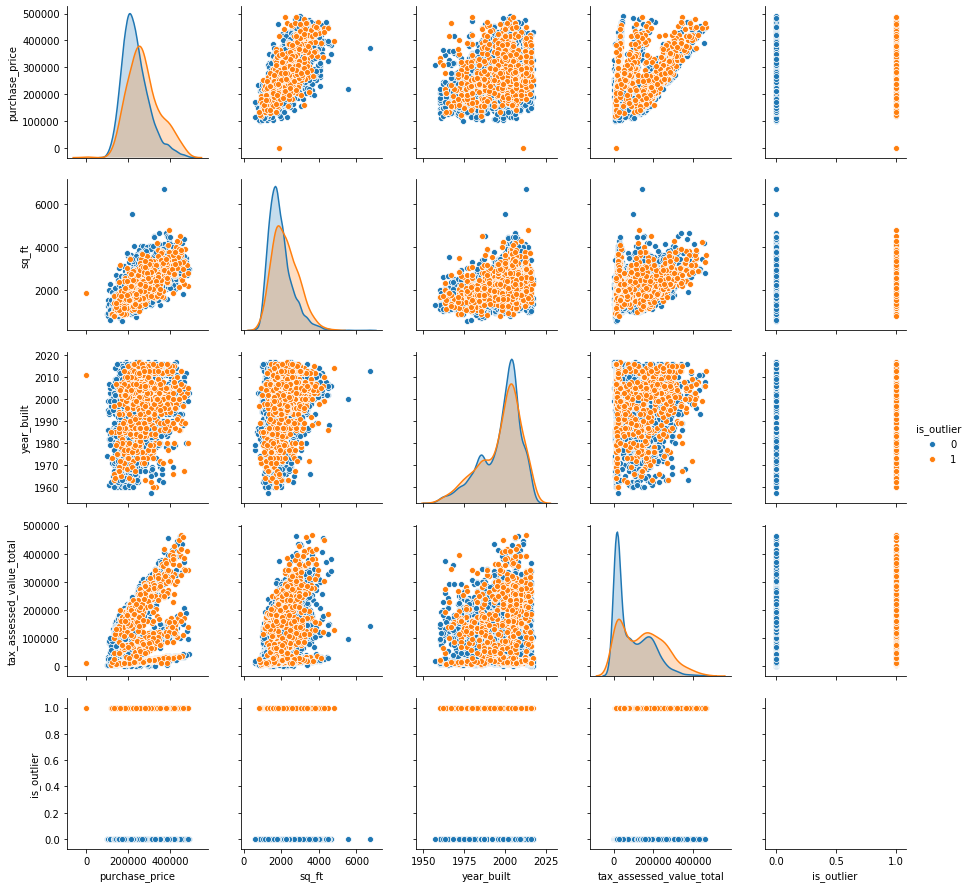

In [143]:
sns.pairplot(df1,hue='is_outlier')

As we can see, the outlier homes distinctly differ from regular homes